In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_csv("Downloads/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.head(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


In [6]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
df.tail(8)

,R&D Spend,Administration,Marketing Spend,State,Profit
42,23640.93,96189.63,148001.11,California,71498.49
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
pd.set_option("display.max_rows",None)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
df.shape

(50, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
import warnings
warnings.filterwarnings('ignore')
df.mean()

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [13]:
df.median()

R&D Spend           73051.080
Administration     122699.795
Marketing Spend    212716.240
Profit             107978.190
dtype: float64

In [14]:
df.State.mode()

0    California
1      New York
dtype: object

In [15]:
df.var()

R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64

In [16]:
df.std()

R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64

In [17]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [18]:
df1=df.rename({'R&D Spend':'RD','Administration':'Ad','Marketing Spend':'mkts'},axis=1)
df1

,RD,Ad,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [19]:
df1.duplicated().sum()

0

In [20]:
df1.iloc[:,1:3]

,Ad,mkts
0,136897.80,471784.10
1,151377.59,443898.53
2,101145.55,407934.54
3,118671.85,383199.62
4,91391.77,366168.42
5,99814.71,362861.36
6,147198.87,127716.82
7,145530.06,323876.68
8,148718.95,311613.29
9,108679.17,304981.62


In [21]:
df1[["RD","Ad"]]

,RD,Ad
0,165349.20,136897.80
1,162597.70,151377.59
2,153441.51,101145.55
3,144372.41,118671.85
4,142107.34,91391.77
5,131876.90,99814.71
6,134615.46,147198.87
7,130298.13,145530.06
8,120542.52,148718.95
9,123334.88,108679.17


In [22]:
df1.isnull().sum()

RD        0
Ad        0
mkts      0
State     0
Profit    0
dtype: int64

# Correlation Analysis

In [23]:
df1.corr()#find correlations

,RD,Ad,mkts,Profit
RD,1.000000,0.241955,0.724248,0.972900
Ad,0.241955,1.000000,-0.032154,0.200717
mkts,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


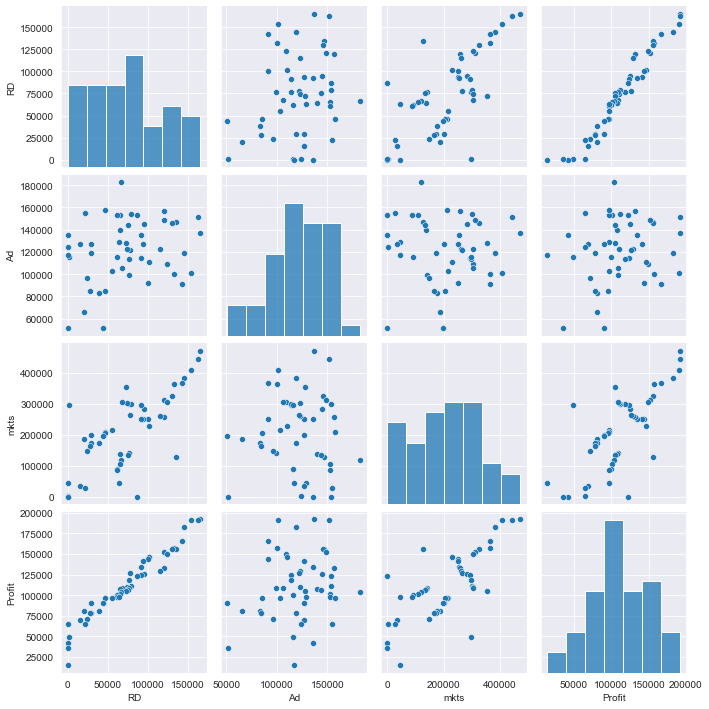

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Model Testing

In [25]:
import statsmodels.formula.api as smf
m1=smf.ols("Profit~RD+Ad+mkts",data=df1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        12:23:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Ad            -0.0268      0.051     -0.526      0.602      -0.130       0.076
mkts           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
m1.params

Intercept    50122.192990
RD               0.805715
Ad              -0.026816
mkts             0.027228
dtype: float64

In [27]:
m1.tvalues,'\n',m1.pvalues

(Intercept     7.626218
 RD           17.846374
 Ad           -0.525507
 mkts          1.655077
 dtype: float64,
 '\n',
 Intercept    1.057379e-09
 RD           2.634968e-22
 Ad           6.017551e-01
 mkts         1.047168e-01
 dtype: float64)

In [28]:
m1.pvalues

Intercept    1.057379e-09
RD           2.634968e-22
Ad           6.017551e-01
mkts         1.047168e-01
dtype: float64

In [29]:
import statsmodels.formula.api as smf
m2=smf.ols("Profit~Ad",data=df1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 08 Oct 2022   Prob (F-statistic):              0.162
Time:                        12:23:49   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Ad             0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
m2.tvalues,'\n',m2.pvalues

(Intercept    3.040044
 Ad           1.419493
 dtype: float64,
 '\n',
 Intercept    0.003824
 Ad           0.162217
 dtype: float64)

In [31]:
m2.rsquared,m2.rsquared_adj

(0.04028714077757223, 0.020293122877105052)

In [32]:
m2.params

Intercept    76974.471305
Ad               0.288749
dtype: float64

In [33]:
import statsmodels.formula.api as smf
m3=smf.ols("Profit~mkts",data=df1).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           4.38e-10
Time:                        12:23:49   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
mkts           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
m3.tvalues,'\n',m3.pvalues

(Intercept    7.808356
 mkts         7.802657
 dtype: float64,
 '\n',
 Intercept    4.294735e-10
 mkts         4.381073e-10
 dtype: float64)

In [35]:
m3.rsquared,m3.rsquared_adj

(0.5591535746115515, 0.5499692740826254)

In [36]:
m3.params

Intercept    60003.548816
mkts             0.246459
dtype: float64

In [37]:
import statsmodels.formula.api as smf
m4=smf.ols("Profit~mkts+Ad",data=df1).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           2.50e-10
Time:                        12:23:49   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
mkts           0.2488      0.030      8.281      0.000       0.188       0.309
Ad             0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [38]:
rmp_RD=smf.ols('RD~Ad+mkts',data=df1).fit().rsquared
Vif_RD=1/(1-rmp_RD)
Vif_RD

2.4689030699947017

In [63]:
rmp_Ad=smf.ols('Ad~RD+mkts',data=df1).fit().rsquared
Vif_Ad=1/(1-rmp_Ad)
Vif_Ad

1.1750910070550453

In [40]:
rmp_mkts=smf.ols('mkts~RD+Ad',data=df1).fit().rsquared
Vif_mkts=1/(1-rmp_mkts)
Vif_mkts

2.3267732905308773

In [41]:
dataset={"Varnames":['Vif_Rd','Vif_Ad','Vif_mkts'],"Values":[Vif_RD,Vif_Ad,Vif_mkts]}
dataset=pd.DataFrame(dataset)
dataset

,Varnames,Values
0,Vif_Rd,2.468903
1,Vif_Ad,1.175091
2,Vif_mkts,2.326773


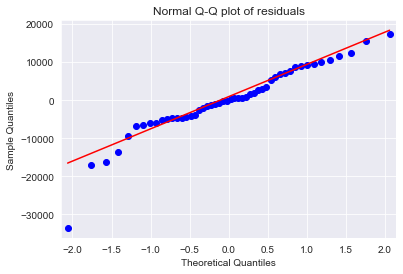

In [42]:
import statsmodels.api as sm
qqplot=sm.qqplot(m1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [43]:
a=list(np.where(m1.resid<-40000))

In [44]:
b=list(np.where(m1.resid>-50000))
b

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int64)]

In [45]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

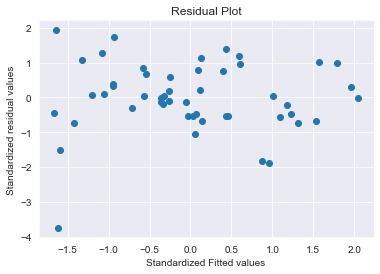

In [46]:
plt.scatter(get_standardized_values(m1.fittedvalues),
            get_standardized_values(m1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

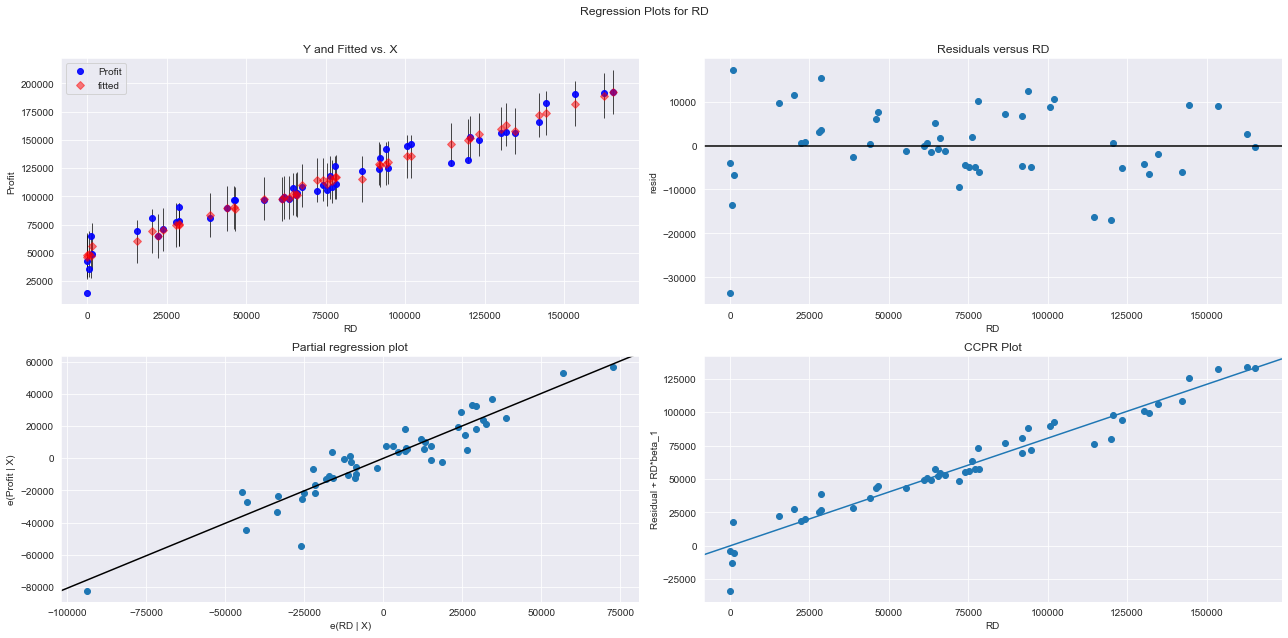

In [47]:
fig=plt.figure(figsize=(18,9))
fig=sm.graphics.plot_regress_exog(m1,"RD",fig=fig)

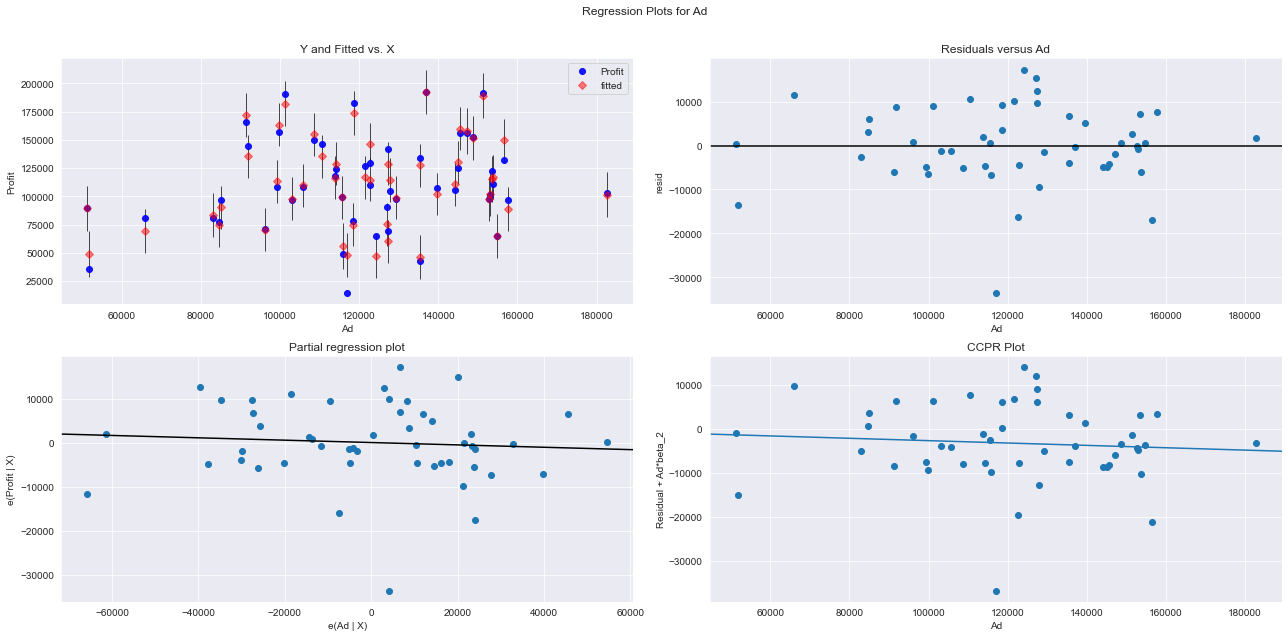

In [48]:
fig=plt.figure(figsize=(18,9))
fig=sm.graphics.plot_regress_exog(m1,"Ad",fig=fig)

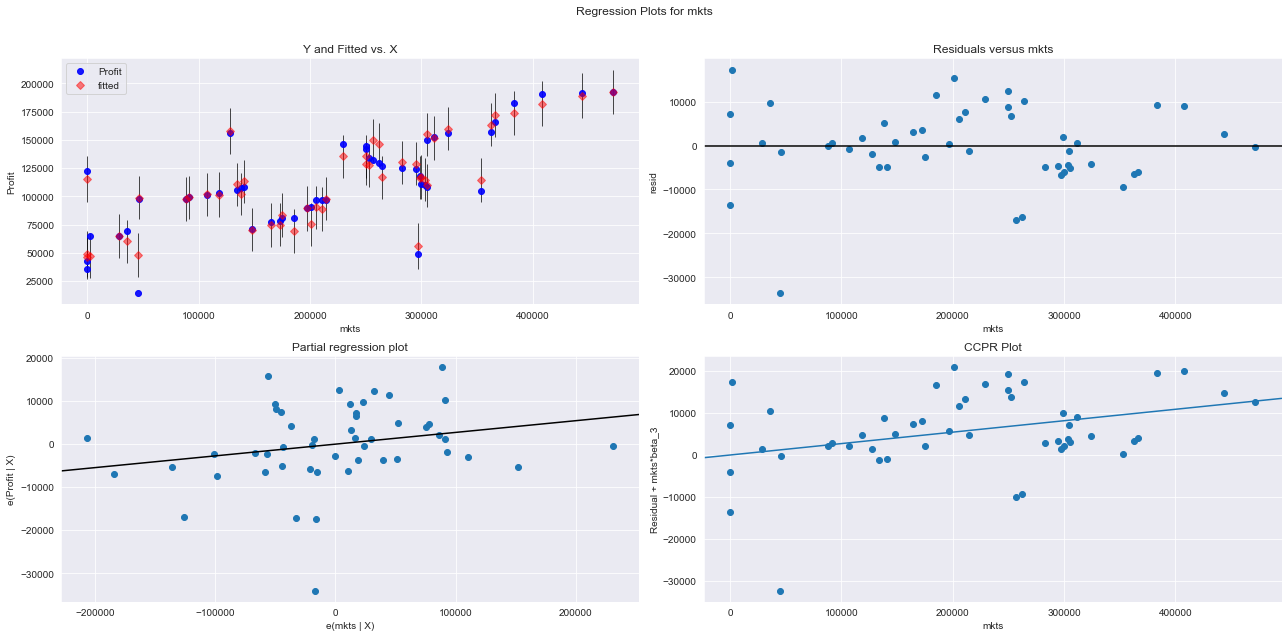

In [49]:
fig=plt.figure(figsize=(18,9))
fig=sm.graphics.plot_regress_exog(m1,"mkts",fig=fig)

# Identify outlayers using cooks distance method

In [65]:
m1_influence=m1.get_influence()
(c,_)=m1_influence.cooks_distance.cooks_distance

AttributeError: 'tuple' object has no attribute 'cooks_distance'

Text(0, 0.5, 'cooks dist')

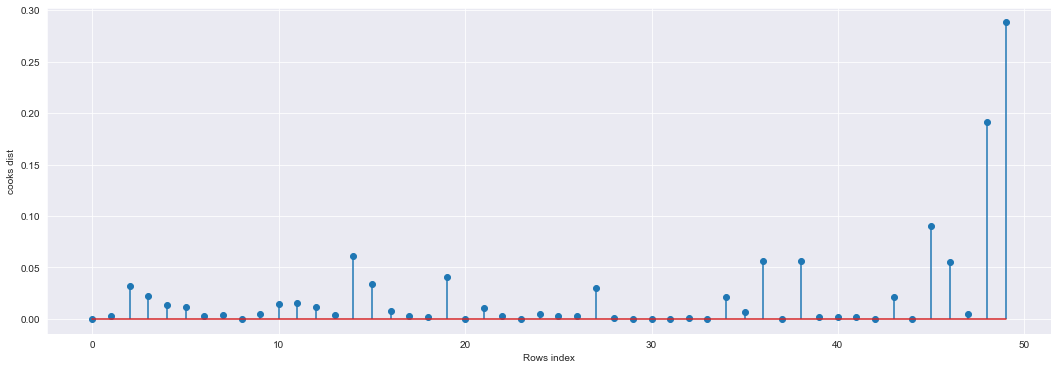

In [51]:
fig=plt.subplots(figsize=(18,6))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel("Rows index")
plt.ylabel("cooks dist")

In [52]:
np.argmax(c),np.max(c)

(49, 0.2880822927543263)

# High Influence points

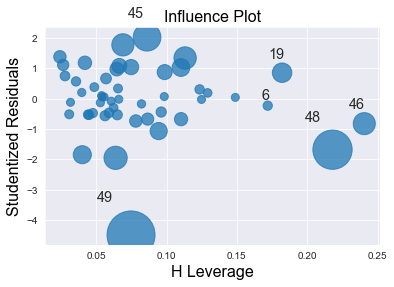

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(m1)
plt.show()

# Calculate the leverage cutt off 

In [54]:
k=df1.shape[1]
n=df1.shape[0]
lev_cuttoff=3*((k+1)/n)
lev_cuttoff

0.36

In [55]:
df1[df1.index.isin([49])]

,RD,Ad,mkts,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# improving the model

In [56]:
df1_new=df1.drop(df.index[49],axis=0).reset_index()
df1_new

,index,RD,Ad,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [57]:
df2=df1_new.drop(["index"],axis=1)

In [58]:
final=smf.ols('Profit~RD+Ad+mkts',data=df2).fit()
final.rsquared,final.aic,final.bic

(0.9613162435129847, 1020.5652974526367, 1028.1325786450793)

# Model Predictions

In [59]:
new_data=pd.DataFrame({'RD':130298.13,"Ad":99814.71,"mkts":362861.36},index=[1])
new_data

,RD,Ad,mkts
1,130298.13,99814.71,362861.36


In [60]:
(final.predict(new_data))

1    161346.403313
dtype: float64

# containing R^2 value for each prepared model

In [61]:
frame={'Prep_Models':['Model','Final_Model'],'Rsquared':[m1.rsquared,final.rsquared]}
table=pd.DataFrame(frame)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
